# **Auto-mpg Deep Learning Version**

**Benedictus Bayu Pramudhito**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [63]:
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

bottle.csv
References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
pima-indians-diabetes.csv
sonar.csv
housing.csv
winequality-white.csv
auto.csv
sales.csv
birth.csv
shampoo.csv
daily-min-temperatures.csv
Quiz
customer.csv
iris.csv
iris (1).csv
Bootcamp Images
parkinsons
numbers_dataset
bottle-updated.csv
auto-mpg.csv
auto (1).csv


In [64]:
  df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/auto-mpg.csv')
  df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [66]:
df.drop(['origin', 'car name'], axis=1, inplace=True)

In [67]:
pd.set_option('display.max_rows', 100)
df['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
67     12
105    12
70     12
65     10
97      9
85      9
140     7
145     7
80      7
84      6
68      6
?       6
92      6
72      6
78      6
71      5
60      5
170     5
180     5
115     5
175     5
130     5
86      5
76      4
83      4
165     4
120     4
52      4
74      3
48      3
125     3
112     3
63      3
190     3
215     3
69      3
225     3
96      3
79      2
198     2
46      2
98      2
53      2
58      2
139     2
87      2
160     2
81      2
155     2
129     2
62      2
153     2
89      1
93      1
220     1
149     1
49      1
103     1
200     1
137     1
108     1
107     1
91      1
210     1
77      1
122     1
64      1
193     1
208     1
82      1
158     1
132     1
116     1
152     1
138     1
133     1
142     1
113     1
66      1
61      1
230     1
148     1
167     1
102     1
94      1
54      1
135     1
Name: horsepower, dtype: int64

In [68]:
df.replace('?', np.nan, inplace=True)

In [69]:
print(df.isnull().sum().sort_values())
print('\nTerdapat {} Missing Values pada Dataset'.format(df.isnull().sum().sum()))

cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
mpg             0
horsepower      6
dtype: int64

Terdapat 6 Missing Values pada Dataset


In [70]:
horse_mean = df['horsepower'].astype(float).mean(axis=0)

In [71]:
df['horsepower'].replace(np.nan, horse_mean, inplace=True)

In [72]:
df.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
mpg             0
dtype: int64

In [73]:
#Casting tipe data kolom horsepower
df[['horsepower']] = df[['horsepower']].astype('float')
df.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
mpg             float64
dtype: object

In [74]:
df.shape

(398, 7)

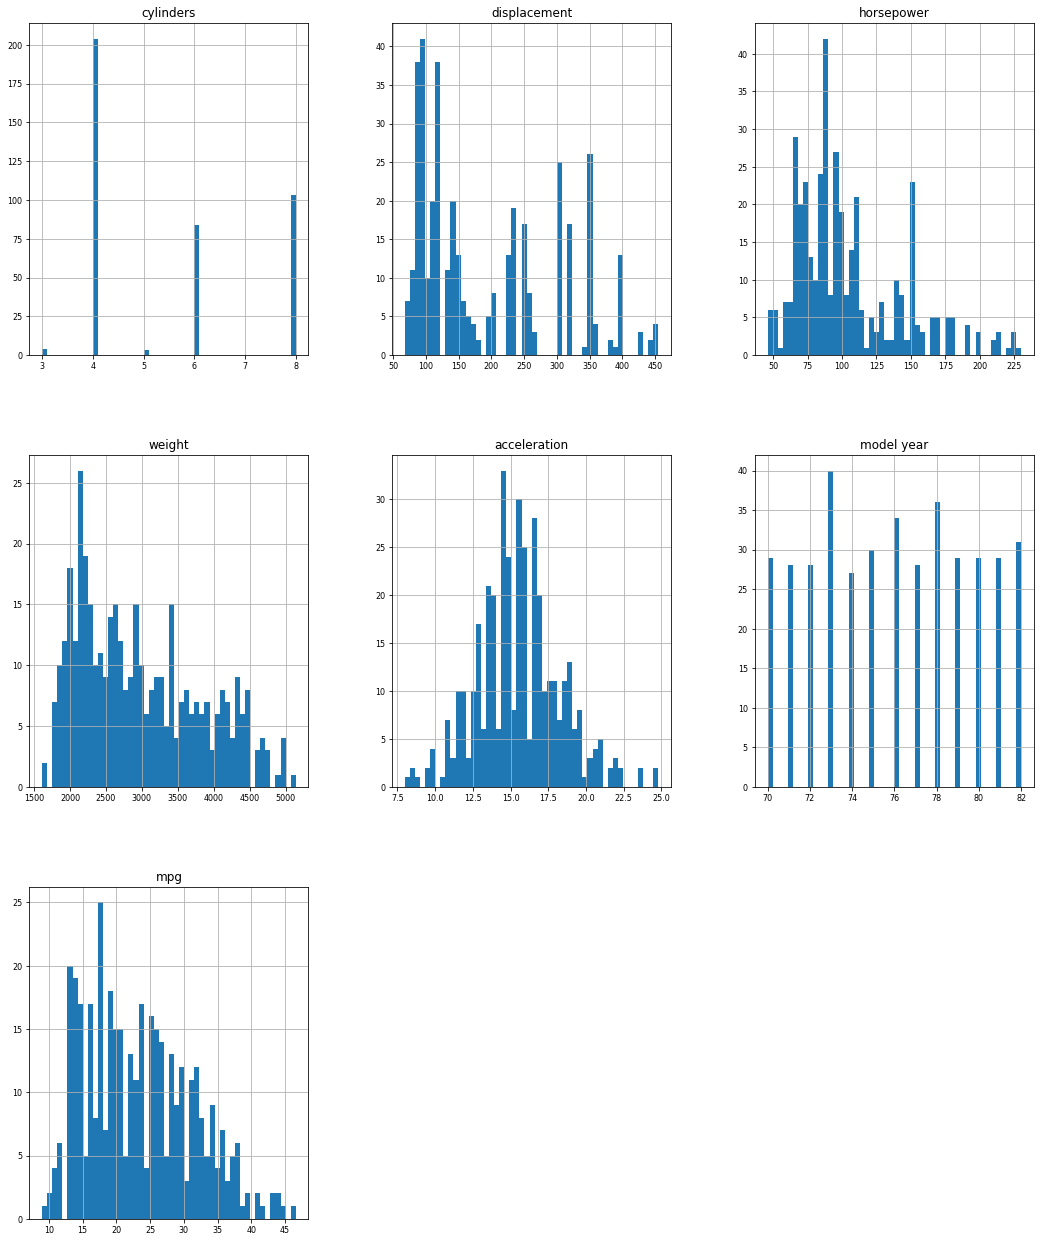

In [75]:
df_numbers = df.select_dtypes(include=['float64', 'int64'])

df_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


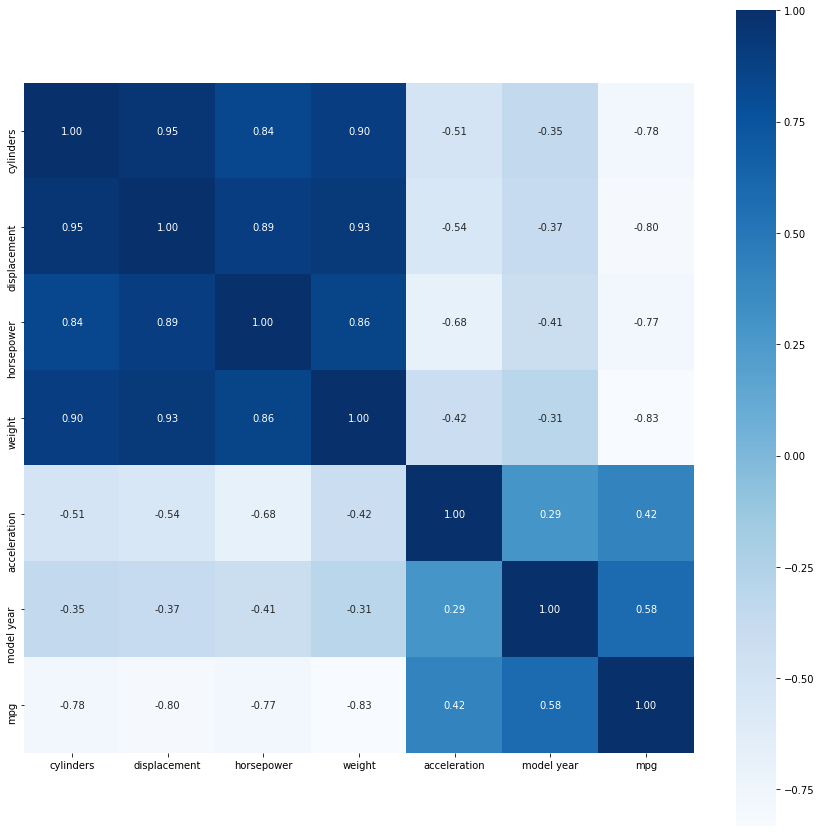

In [77]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, cbar=True, square=True, fmt='.2f', cmap='Blues')
plt.show()

In [78]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


## **Machine Learning Model**

### **Linear Regression**

**Feature Engineering**

In [79]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [80]:
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [81]:
stdr = StandardScaler()

X = stdr.fit_transform(X.values)
y = stdr.fit_transform(df['mpg'].values.reshape(-1, 1)).flatten()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [83]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

predict_lm = linreg.predict(X_test)

In [84]:
mse = mean_squared_error(y_test, predict_lm)
mae = mean_absolute_error(y_test, predict_lm)
r2 = r2_score(y_test, predict_lm)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_lm)))

MSE (Mean Squared Error)       : 0.21633017718256964
MAE (Mean Absolute Error)      : 0.37634593904440616
r^2 score                      : 0.7844440876524889
RMSE (Root Mean Squared Error  : 0.46511307999514445


## **Deep Learning Model**

In [85]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  

In [87]:
model = Sequential()
model.add(Dense(13, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 13)                91        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 14        
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [89]:
history1 = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.9488 - val_loss: 0.8862
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7712 - val_loss: 0.6419
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5379 - val_loss: 0.4508
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3884 - val_loss: 0.3466
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2956 - val_loss: 0.2867
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2473 - val_loss: 0.2577
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2202 - val_loss: 0.2386
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1995 - val_loss: 0.2206
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1832 - val_loss: 0.2059
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1702 - val_loss: 0.1964
Epoch 11/

In [90]:
predict_dl = model.predict(X_test)

predict_dl = predict_dl.flatten()

In [91]:
mse = mean_squared_error(y_test, predict_dl)
mae = mean_absolute_error(y_test, predict_dl)
r2 = r2_score(y_test, predict_dl)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error) :', np.sqrt(mean_squared_error(y_test, predict_dl)))

MSE (Mean Squared Error)       : 0.1568649897027577
MAE (Mean Absolute Error)      : 0.30789173709276363
r^2 score                      : 0.8436964439675718
RMSE (Root Mean Squared Error) : 0.39606185085508766


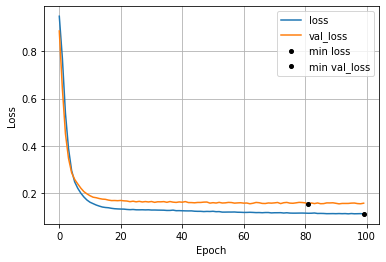

Minimum Loss             : 99    0.111405
Name: loss, dtype: float64

Minimum Validation Loss  : 81    0.153432
Name: val_loss, dtype: float64


In [92]:
plot_loss_new(history1)

Sweet spot berada di epoch 81 dengan val_loss 0.153432

## **Deep Learning Model with Deeper Layer**

In [93]:
deeper = Sequential()
deeper.add(Dense(13, input_dim=6, kernel_initializer='normal', activation='relu'))
deeper.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper.add(Dense(1, kernel_initializer='normal'))

deeper.compile(loss='mean_squared_error', optimizer='adam')

In [94]:
history2 = deeper.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.9921 - val_loss: 0.9851
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9247 - val_loss: 0.8386
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.7030 - val_loss: 0.5564
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4881 - val_loss: 0.4057
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3402 - val_loss: 0.2966
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2469 - val_loss: 0.2431
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2101 - val_loss: 0.2243
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1890 - val_loss: 0.2059
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1749 - val_loss: 0.1948
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1612 - val_loss: 0.1861
Epoch 11/

In [95]:
predict_deep = deeper.predict(X_test)
predict_deep = predict_deep.flatten()

In [96]:
mse = mean_squared_error(y_test, predict_deep)
mae = mean_absolute_error(y_test, predict_deep)
r2 = r2_score(y_test, predict_deep)
print("MSE (Mean Squared Error)         :", mse)
print("MAE (Mean Absolute Error)        :", mae)
print("r^2 score                        :", r2)
print('RMSE (Root Mean Squared Error)   :', np.sqrt(mean_squared_error(y_test, predict_deep)))

MSE (Mean Squared Error)         : 0.15669993596287107
MAE (Mean Absolute Error)        : 0.30578922267423253
r^2 score                        : 0.8438609069655271
RMSE (Root Mean Squared Error)   : 0.3958534273728991


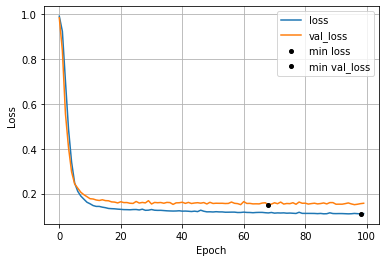

Minimum Loss             : 98    0.10908
Name: loss, dtype: float64

Minimum Validation Loss  : 68    0.150145
Name: val_loss, dtype: float64


In [97]:
plot_loss_new(history2)

Sweet spot berada di epoch 68 dengan val_loss 0.150145

## **Deep Learning with Wider Layer**

In [98]:
wider = Sequential()
wider.add(Dense(20, input_dim=6, kernel_initializer='normal', activation='relu'))
wider.add(Dense(1, kernel_initializer='normal'))

wider.compile(loss='mean_squared_error', optimizer='adam')

In [99]:
wider.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [100]:
history3 = wider.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.9278 - val_loss: 0.8438
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6839 - val_loss: 0.5349
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3728 - val_loss: 0.2972
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2379 - val_loss: 0.2515
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2125 - val_loss: 0.2311
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1935 - val_loss: 0.2111
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1766 - val_loss: 0.2023
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1652 - val_loss: 0.1889
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1556 - val_loss: 0.1797
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1481 - val_loss: 0.1760
Epoch 11/

In [101]:
predict_wide = wider.predict(X_test)
predict_wide = predict_wide.flatten()

In [102]:
mse = mean_squared_error(y_test, predict_wide)
mae = mean_absolute_error(y_test, predict_wide)
r2 = r2_score(y_test, predict_wide)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_wide)))

MSE (Mean Squared Error)       : 0.16202551615457575
MAE (Mean Absolute Error)      : 0.3095874111132763
r^2 score                      : 0.8385543874962904
RMSE (Root Mean Squared Error  : 0.4025239323997714


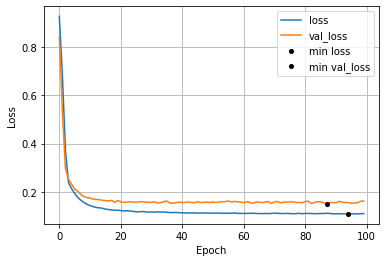

Minimum Loss             : 94    0.108293
Name: loss, dtype: float64

Minimum Validation Loss  : 87    0.151195
Name: val_loss, dtype: float64


In [103]:
plot_loss_new(history3)

Sweet spot berada di epoch 87 dengan val_loss 0.151195

Model terbaik adalah model deep learning dengan deeper layer berdasarkan r2 score dan RMSEnya (beda tipis dengan model deep learning dengan baseline layer), sehingga model deeper layer akan dicoba dengan optimizer lainnya seperti RMSprop dan SGD

## **Deep Learning Deeper Model with SGD Optimizer**

In [105]:
from tensorflow.keras.optimizers import SGD

In [106]:
wider1 = Sequential()
wider1.add(Dense(13, input_dim=6, kernel_initializer='normal', activation='relu'))
wider1.add(Dense(6, kernel_initializer='normal', activation='relu'))
wider1.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)

wider1.compile(loss='mean_squared_error', optimizer=opt)

In [107]:
wider1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 13)                91        
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 7         
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [108]:
history2_sgd = wider1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.9988 - val_loss: 1.0074
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0004 - val_loss: 1.0059
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0013 - val_loss: 1.0072
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9949 - val_loss: 1.0036
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9928 - val_loss: 1.0026
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9906 - val_loss: 0.9986
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9867 - val_loss: 0.9914
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9782 - val_loss: 0.9868
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9669 - val_loss: 0.9702
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9480 - val_loss: 0.9425
Epoch 11/

In [109]:
predict_sgd = wider1.predict(X_test)
predict_sgd = predict_sgd.flatten()

In [110]:
mse = mean_squared_error(y_test, predict_sgd)
mae = mean_absolute_error(y_test, predict_sgd)
r2 = r2_score(y_test, predict_sgd)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_sgd)))

MSE (Mean Squared Error)       : 0.16069691884106585
MAE (Mean Absolute Error)      : 0.30962493164842425
r^2 score                      : 0.8398782296425222
RMSE (Root Mean Squared Error  : 0.40087020198695966


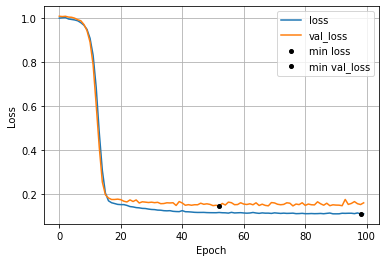

Minimum Loss             : 98    0.11036
Name: loss, dtype: float64

Minimum Validation Loss  : 52    0.146274
Name: val_loss, dtype: float64


In [111]:
plot_loss_new(history2_sgd)

Sweet spot berada di epoch 52 dengan val_loss 0.146274

## **Deep Learning Deeper Model with RMSprop Optimizer**

In [113]:
from tensorflow.keras.optimizers import RMSprop

In [114]:
wider2 = Sequential()
wider2.add(Dense(13, input_dim=6, kernel_initializer='normal', activation='relu'))
wider2.add(Dense(6, kernel_initializer='normal', activation='relu'))
wider2.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(learning_rate=0.001, momentum=0.9)

wider2.compile(loss='mean_squared_error', optimizer=opt)

In [115]:
wider2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 13)                91        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [116]:
history2_rms = wider2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5861 - val_loss: 0.2167
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1862 - val_loss: 0.1864
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1515 - val_loss: 0.1774
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1410 - val_loss: 0.1658
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1525
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1309 - val_loss: 0.1779
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1462 - val_loss: 0.1525
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1287 - val_loss: 0.1580
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1285 - val_loss: 0.1868
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1337 - val_loss: 0.1729
Epoch 11/

In [117]:
predict_rms = wider2.predict(X_test)
predict_rms = predict_rms.flatten()

In [118]:
mse = mean_squared_error(y_test, predict_rms)
mae = mean_absolute_error(y_test, predict_rms)
r2 = r2_score(y_test, predict_rms)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_rms)))

MSE (Mean Squared Error)       : 0.2019532232702348
MAE (Mean Absolute Error)      : 0.3458746853058453
r^2 score                      : 0.7987695851753613
RMSE (Root Mean Squared Error  : 0.44939205964306356


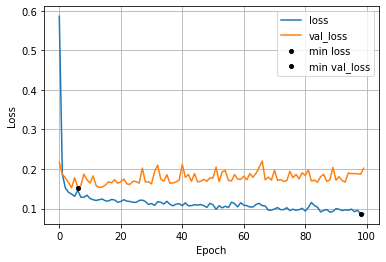

Minimum Loss             : 98    0.086383
Name: loss, dtype: float64

Minimum Validation Loss  : 6    0.15246
Name: val_loss, dtype: float64


In [119]:
plot_loss_new(history2_rms)

Sweet spot berada di epoch 6 dengan val_loss 0.15246

## **Kesimpulan**

1. R2 score model Linear Regression            : 0.7844440876524889
2. R2 score Deep Learning Model Baseline Layer : 0.8436964439675718
3. R2 score Deep Learning Model Deeper Layer   : 0.8438609069655271
4. R2 score Deep Learning Model Wider Layer   : 0.8385543874962904
5. R2 score Deep Learning Model Deeper Layer SGD Optimizer   : 0.8398782296425222
6. R2 score Deep Learning Model Deeper Layer RMSprop Optimizer : 0.7987695851753613

Model terbaik adalah model Deep Learning dengan Deeper Layer dan Optimizer Adam